In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0
100% 5.19G/5.20G [00:37<00:00, 218MB/s]
100% 5.20G/5.20G [00:37<00:00, 148MB/s]


In [ ]:
! unzip brain-tumor-mri-dataset.zip

unzip:  cannot find or open brain-tumor-mri-dataset.zip, brain-tumor-mri-dataset.zip.zip or brain-tumor-mri-dataset.zip.ZIP.


In [ ]:
import zipfile
with zipfile.ZipFile("skin-cancer-mnist-ham10000.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

In [ ]:
import os

base_skin_dir = os.path.join('.', '/content/HAM10000_images_part_1')
imageid_path_dict = {os.path.splitext(img)[0]: os.path.join(base_skin_dir, img)
                     for img in os.listdir(base_skin_dir) if img.endswith('.jpg')}

base_skin_dir = os.path.join('.', '/content/HAM10000_images_part_2')
for img in os.listdir(base_skin_dir):
  if img.endswith('.jpg'):
    imageid_path_dict[os.path.splitext(img)[0]] = os.path.join(base_skin_dir, img)



In [ ]:
import pandas as pd

# Assuming you have a CSV file named 'HAM10000_metadata.csv' in your current directory
df_original = pd.read_csv('HAM10000_metadata.csv')

# Create a new column 'path' containing the image path
df_original['path'] = df_original['image_id'].map(imageid_path_dict.get)

# Create a new column 'cell_type' containing the short name of the lesion type
df_original['cell_type'] = df_original['dx']

# Create a new column 'cell_type_idx' containing the categorized lesion type
lesion_type_dict = {
    'nv': 0,
    'mel': 1,
    'bkl': 2,
    'bcc': 3,
    'akiec': 4,
    'vasc': 5,
    'df': 6,
}
lesion_type_dict_name = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
df_original['cell_type_idx'] = df_original['dx'].map(lesion_type_dict.get)
df_original['cell_type_name'] = df_original['dx'].map(lesion_type_dict_name.get)

# Print the updated DataFrame
print(df_original.head())

     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                               path cell_type  cell_type_idx  \
0  /content/HAM10000_images_part_1/ISIC_0027419.jpg       bkl              2   
1  /content/HAM10000_images_part_1/ISIC_0025030.jpg       bkl              2   
2  /content/HAM10000_images_part_1/ISIC_0026769.jpg       bkl              2   
3  /content/HAM10000_images_part_1/ISIC_0025661.jpg       bkl              2   
4  /content/HAM10000_images_part_2/ISIC_0031633.jpg       bkl              2   

                   cell_type_name  
0  Benign keratosis-like lesions   
1  Benign keratosis-like l

In [ ]:
df_original.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,cell_type_name
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/HAM10000_images_part_1/ISIC_0027419.jpg,bkl,2,Benign keratosis-like lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/HAM10000_images_part_1/ISIC_0025030.jpg,bkl,2,Benign keratosis-like lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/HAM10000_images_part_1/ISIC_0026769.jpg,bkl,2,Benign keratosis-like lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/HAM10000_images_part_1/ISIC_0025661.jpg,bkl,2,Benign keratosis-like lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/HAM10000_images_part_2/ISIC_0031633.jpg,bkl,2,Benign keratosis-like lesions


In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lesion_id       10015 non-null  object 
 1   image_id        10015 non-null  object 
 2   dx              10015 non-null  object 
 3   dx_type         10015 non-null  object 
 4   age             9958 non-null   float64
 5   sex             10015 non-null  object 
 6   localization    10015 non-null  object 
 7   path            10015 non-null  object 
 8   cell_type       10015 non-null  object 
 9   cell_type_idx   10015 non-null  int64  
 10  cell_type_name  10015 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 860.8+ KB


In [ ]:
df_original.isnull().sum()

,0
lesion_id,0
image_id,0
dx,0
dx_type,0
age,57
sex,0
localization,0
path,0
cell_type,0
cell_type_idx,0


In [ ]:
df_original['age'].fillna((df_original['age'].mean()), inplace=True)

<ipython-input-9-e8cdff712649>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original['age'].fillna((df_original['age'].mean()), inplace=True)


In [ ]:
df_original.isnull().sum()

,0
lesion_id,0
image_id,0
dx,0
dx_type,0
age,0
sex,0
localization,0
path,0
cell_type,0
cell_type_idx,0


In [ ]:
df_original["dx_type"].value_counts()

,count
dx_type,
histo,5340
follow_up,3704
consensus,902
confocal,69


<ipython-input-16-4ea2dd7fce7d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='cell_type_name',data=df_original, order = df_original['cell_type_name'].value_counts().index, palette = 'Paired')


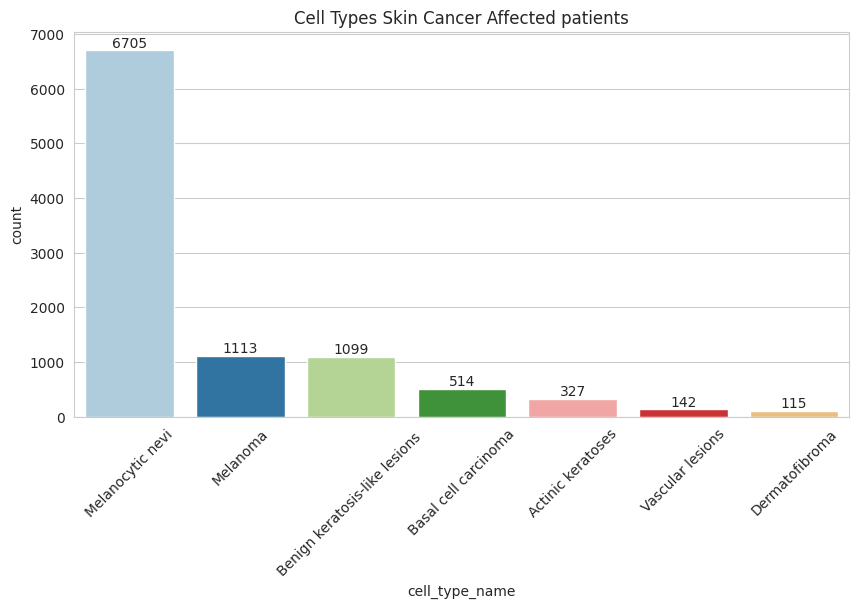

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='cell_type_name',data=df_original, order = df_original['cell_type_name'].value_counts().index, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Skin Cancer Affected patients')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import numpy as np
from PIL import Image

df_original['image'] = df_original['path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))
df_original.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,cell_type_name,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/HAM10000_images_part_1/ISIC_0027419.jpg,bkl,2,Benign keratosis-like lesions,"[[[190, 153, 194], [192, 154, 196], [191, 153,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/HAM10000_images_part_1/ISIC_0025030.jpg,bkl,2,Benign keratosis-like lesions,"[[[23, 13, 22], [24, 14, 24], [25, 14, 28], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/HAM10000_images_part_1/ISIC_0026769.jpg,bkl,2,Benign keratosis-like lesions,"[[[185, 127, 137], [189, 133, 147], [194, 136,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/HAM10000_images_part_1/ISIC_0025661.jpg,bkl,2,Benign keratosis-like lesions,"[[[24, 11, 17], [26, 13, 22], [38, 21, 32], [5..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/HAM10000_images_part_2/ISIC_0031633.jpg,bkl,2,Benign keratosis-like lesions,"[[[134, 90, 113], [147, 102, 125], [159, 115, ..."


In [ ]:
df_original["image"].map(lambda x: x.shape).value_counts()


,count
image,
"(75, 100, 3)",10015


In [ ]:
features=df_original.drop(columns=['cell_type_idx'],axis=1)
target=df_original['cell_type_idx']

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

In [ ]:
x_train = np.asarray(X_train['image'].tolist())
x_test = np.asarray(X_test['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train, num_classes=7)
y_test_encoded = to_categorical(y_test, num_classes=7)

In [ ]:
X_train_final, X_val, y_train_final, y_val = train_test_split(
    x_train, y_train_encoded, test_size=0.2, random_state=42
)

In [ ]:
x_train = X_train_final.reshape(X_train_final.shape[0], *(75, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(75, 100, 3))
x_validate = X_val.reshape(X_val.shape[0], *(75, 100, 3))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate images randomly within a range of 20 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10% of the image width
    height_shift_range=0.1,  # Shift images vertically by up to 10% of the image height
    shear_range=0.2,  # Apply shear transformation with a maximum shear angle of 20 degrees
    zoom_range=0.2,  # Apply random zoom with a maximum zoom factor of 20%
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill in any missing pixels with the nearest existing pixel
)

# Fit the data augmentation parameters to the training data
datagen.fit(x_train)

# Create a generator that yields augmented images from the training data
train_generator = datagen.flow(x_train, y_train_final, batch_size=32)


In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model


# Load the pre-trained DenseNet201 model (without the top classification layer)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(75, 100, 3))

# Add custom layers for your specific classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
  layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.001)

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=(x_validate, y_val),
    callbacks=[learning_rate_reduction]
)

Epoch 1/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.7133 - loss: 0.8416 - val_accuracy: 0.7293 - val_loss: 0.7191 - learning_rate: 0.0010
Epoch 2/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 371s 2s/step - accuracy: 0.7205 - loss: 0.7868 - val_accuracy: 0.7236 - val_loss: 0.7053 - learning_rate: 0.0010
Epoch 3/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.7270 - loss: 0.7572 - val_accuracy: 0.7473 - val_loss: 0.6788 - learning_rate: 0.0010
Epoch 4/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.7330 - loss: 0.7391 - val_accuracy: 0.7330 - val_loss: 0.6771 - learning_rate: 0.0010
Epoch 5/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.7407 - loss: 0.7150 - val_accuracy: 0.7449 - val_loss: 0.6737 - learning_rate: 0.0010
Epoch 6/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.7421 - loss: 0.6962 - val_accuracy: 0.7530 - val_loss: 0.6590 - learning_rate: 0.0010
Epoch 7/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.7515 - loss: 0.

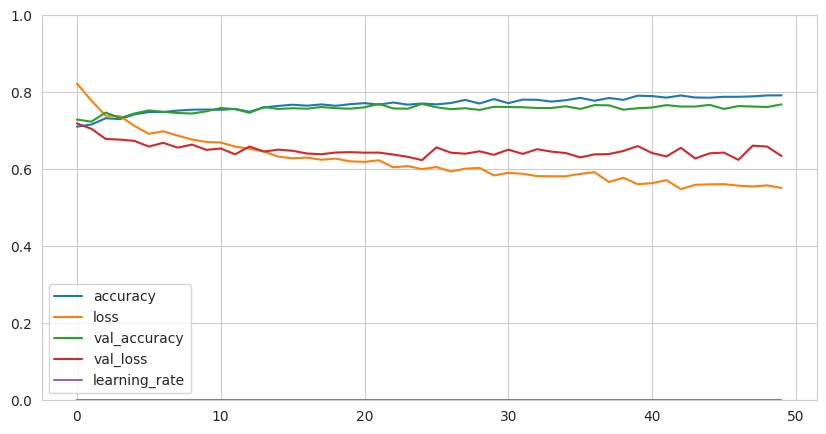

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from tensorflow.keras.utils import to_categorical

# Assuming you have your model and test data (x_test, y_test)

y_pred_prob = model.predict(x_test)  # Get predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Get predicted class labels
y_true = np.argmax(y_test_encoded, axis=1)  # Get true class labels

# Calculate F1 score (macro-averaged)
f1 = f1_score(y_true, y_pred, average='macro')
print("F1 Score:", f1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)


# Calculate ROC AUC (only if you have binary classification or want to compute it for each class)
roc_auc = roc_auc_score(y_test_encoded, y_pred_prob, multi_class='ovr')
print("ROC AUC:", roc_auc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step
F1 Score: 0.5343893395105226
Accuracy: 0.7658512231652521
ROC AUC: 0.9232144133039669
